<a href="https://colab.research.google.com/github/GitAmitesh/SkinDiseaseClassificationCNN/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin Disease Classification using CNN


### Imports

In [1]:
import zipfile
import os
from google.colab import drive
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Files extraction

##### DO NOT RUN THE EXTRACTION AGAIN AFTER FIRST EXECUTION

In [2]:
# !fusermount -u drive
# drive.mount('/content/drive')

# # Define the path of your ZIP file
# zip_path = "/content/drive/MyDrive/HAM10000/HAM10000.zip"  # Change this to your actual file path
# extraction_path = "/content/drive/MyDrive/HAM10000/"  # Change this to your desired extraction path

# # Extract the ZIP file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extraction_path)  # Extract into a specific folder

# print("Dataset Extracted Successfully!")

fusermount: failed to unmount /content/drive: No such file or directory
Mounted at /content/drive
Dataset Extracted Successfully!


In [18]:
extraction_path = "/content/drive/MyDrive/HAM10000/"
print("Folders and files inside dataset:")
print(os.listdir(extraction_path))  # Lists extracted files & folders

Folders and files inside dataset:
['HAM10000.zip', 'HAM10000_images_part_1', 'HAM10000_images_part_2', 'HAM10000_metadata.csv', 'ham10000_images_part_1', 'ham10000_images_part_2', 'hmnist_28_28_L.csv', 'hmnist_28_28_RGB.csv', 'hmnist_8_8_L.csv', 'hmnist_8_8_RGB.csv']


In [5]:
# Load metadata CSV file
metadata_path = os.path.join(extraction_path, "HAM10000_metadata.csv")  # Ensure correct file name
df = pd.read_csv(metadata_path)

# Display first few rows
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [13]:
# Get all image file paths
image_paths1 = glob.glob(os.path.join(extraction_path, "HAM10000_images_part_1", "*.jpg"))
image_paths2 = glob.glob(os.path.join(extraction_path, "HAM10000_images_part_2", "*.jpg"))

# Merge both image lists
all_image_paths = image_paths1 + image_paths2

# Convert list to dictionary for easy lookup
image_path_dict = {os.path.basename(path): path for path in all_image_paths}

# Add image paths to DataFrame
df["image_path"] = df["image_id"].map(lambda id: image_path_dict.get(id + ".jpg"))

# Display updated DataFrame
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000/HAM10000_image...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000/HAM10000_image...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000/HAM10000_image...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000/HAM10000_image...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/HAM10000/HAM10000_image...


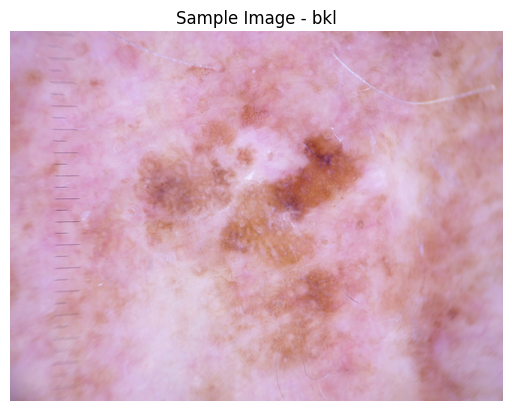

In [16]:
# Load and display a sample image using Matplotlib
sample_image_path = df.iloc[0]["image_path"]  # Get the image path
image = mpimg.imread(sample_image_path)  # Read the image as an array

plt.imshow(image)  # Display the image
plt.axis("off")  # Hide axes
plt.title(f"Sample Image - {df.iloc[0]['dx']}")  # Add title with disease label
plt.show()  # Show the image
